## CiFAR-10 Images Classification Using CNNs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

2024-07-14 13:43:56.863427: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-14 13:43:59.559923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

## Visualize Data

[0]


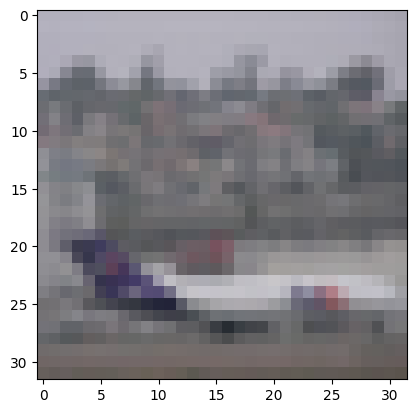

In [7]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

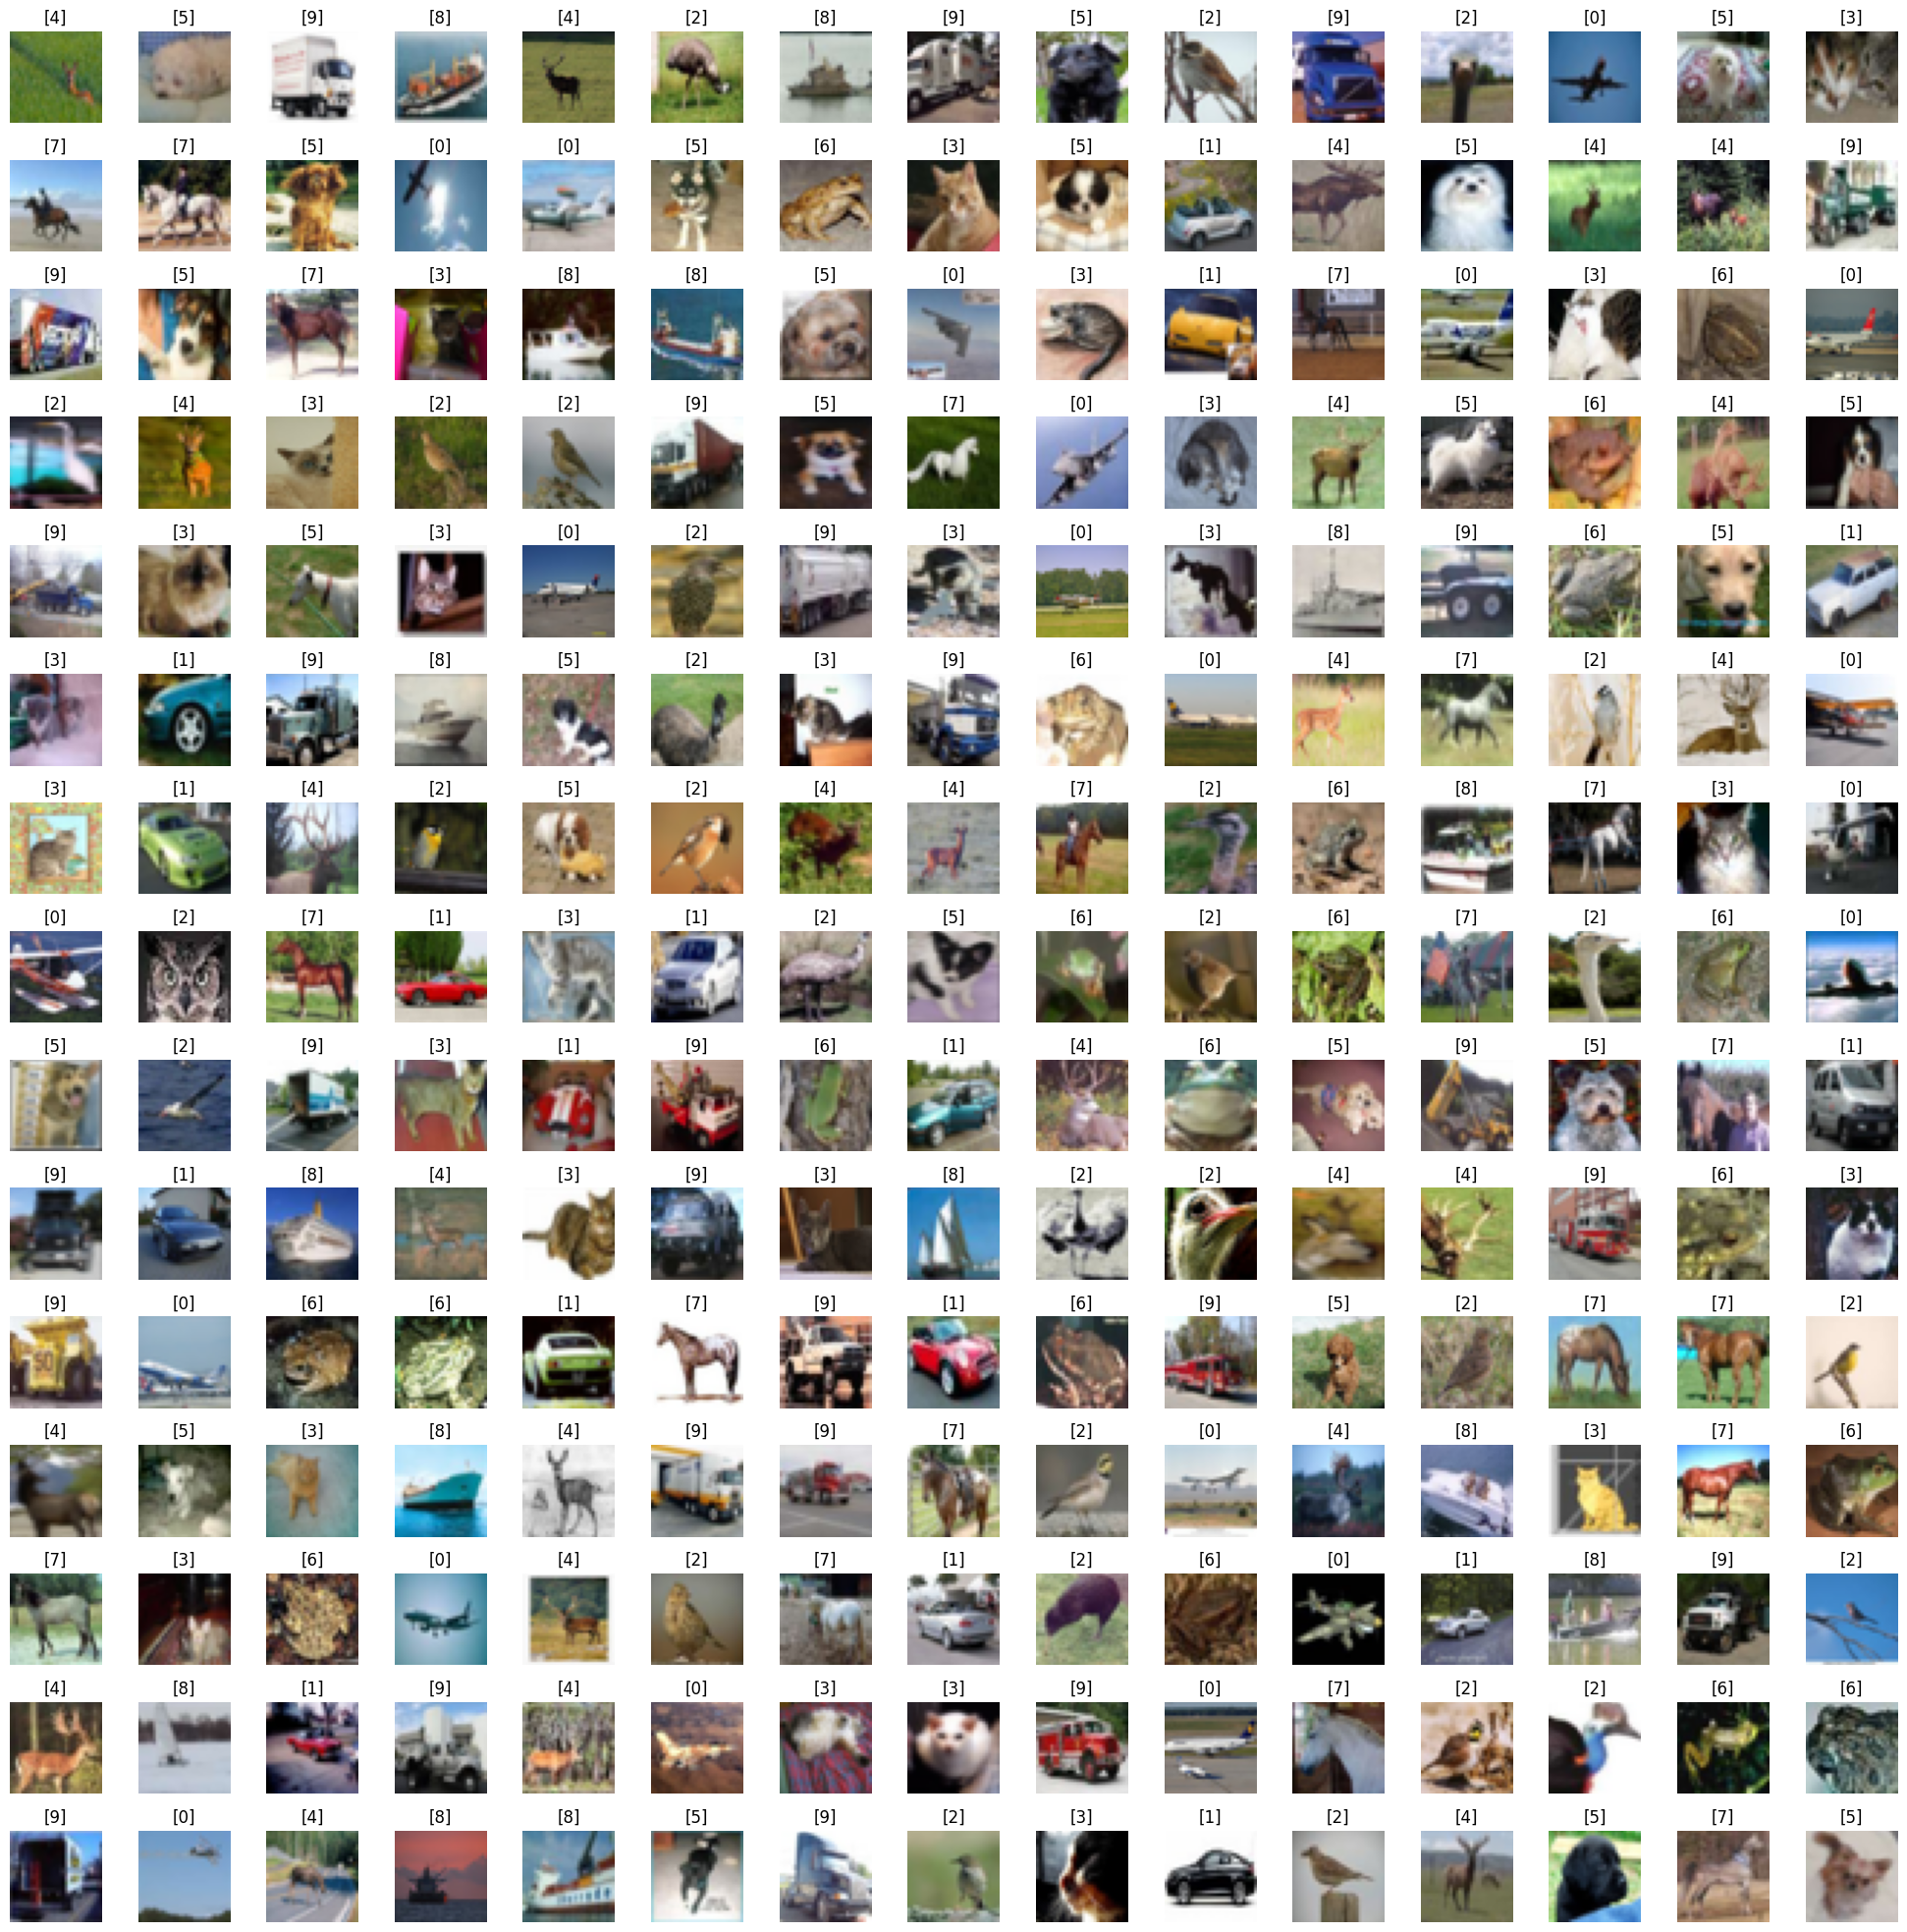

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

## Data Preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [14]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

## Train the Model

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])


## Build the Model

In [23]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs = 2, shuffle= True )

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 87ms/step - accuracy: 0.3149 - loss: 1.8617
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.5716 - loss: 1.2199


## Evaluate the Model

In [24]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6448 - loss: 1.0316
Test Accuracy : 0.6453999876976013


In [25]:
predicted = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted, axis = 1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([5, 0, 0, ..., 5, 4, 7])

In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [27]:
y_test = y_test.argmax(1)

In [28]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

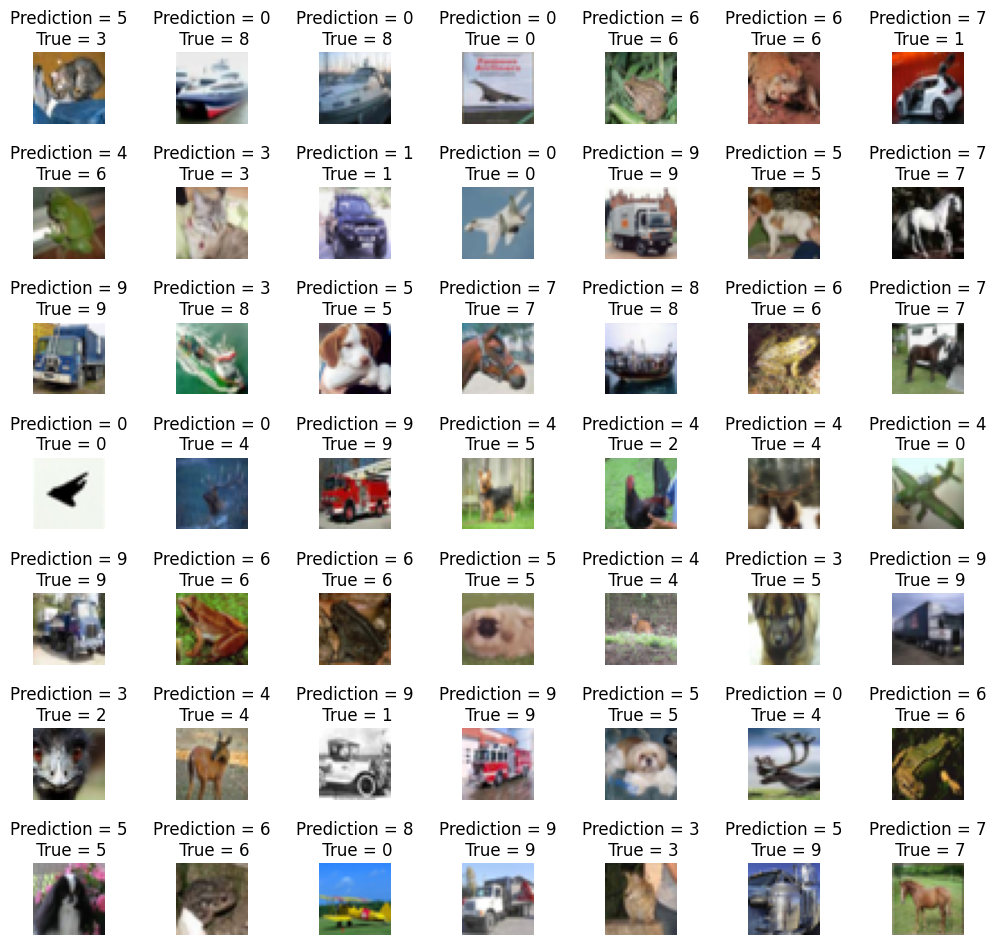

In [29]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

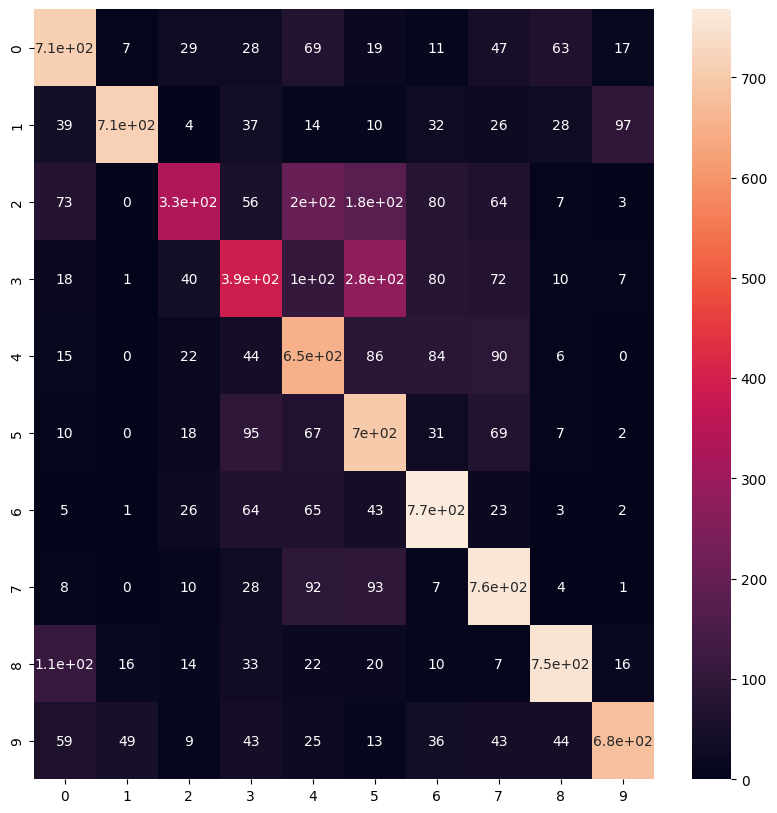

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

## Save the Model

In [31]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

## DATA AUGMENTATION FOR THE CIFAR-10 DATASET

creating endless versions of the data 

In [32]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [33]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
n = 13
X_train_samples = X_train[:n]
X_train_samples.shape

(13, 32, 32, 3)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
datagen_train = ImageDataGenerator(vertical_flip=True)
datagen_train.fit(X_train_samples)

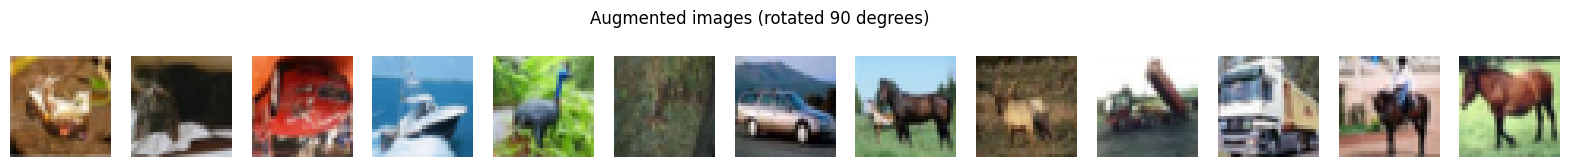

In [38]:
from PIL import Image
fig = plt.figure(figsize=(20, 2))
x_batch = next(datagen_train.flow(X_train_samples, batch_size=n))
for i in range(0, n):
    ax = fig.add_subplot(1, n, i + 1)  
    ax.imshow(Image.fromarray(x_batch[i].astype('uint8')))  
    ax.axis('off')
plt.suptitle('Augmented images (rotated 90 degrees)')  
plt.show()

## Training the Model with the augmented Data

In [43]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [44]:
datagen.fit(X_train)

In [45]:
y_train_endoded = keras.utils.to_categorical(y_train, number_cat)

In [47]:
cnn_model.fit(datagen.flow(X_train, y_train_endoded, batch_size=32), epochs=2)

Epoch 1/2
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 24:55 958ms/step - accuracy: 0.1875 - loss: 368.2446

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 66ms/step - accuracy: 0.2573 - loss: 5.8008
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.3437 - loss: 1.8268


In [49]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [50]:
evaluation_aug = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {}'.format(evaluation_aug[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3570 - loss: 1.8000
Test Accuracy : 0.35409998893737793


In [51]:
predicted = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted, axis = 1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([9, 1, 9, ..., 7, 7, 7])

In [52]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [53]:
y_test = y_test.argmax(1)

In [54]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
# Save the model
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_augmented_trained_model.h5')
cnn_model.save(model_path)